In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

csv1 = '../data/overdose_counts.csv'
csv2 = '../data/opiate_prescribers15.csv'
csv3 = '../data/opiate_prescribers16.csv'
csv4 = '../data/physician_ratings16.csv'

overdose_counts = pd.read_csv(csv1)
op_prescriber15 = pd.read_csv(csv2)
op_prescriber16 = pd.read_csv(csv3)
phys_ratings16 = pd.read_csv(csv4)


In [2]:
#raw dataframe
overdose_counts.head()

VSRR_Provisional_Drug_Overdose_Death_Counts
State State Name Year Month    Indicator        Data Value Predicted Value Percent Complete Percent Pending Investigation                                           Footnote
AK    AK         2015 January  Number of Deaths 4,034      NaN             100              0                              Numbers may differ from published reports usin...
                      February Number of Deaths 4,084      NaN             100              0                              Numbers may differ from published reports usin...
                      March    Number of Deaths 4,101      NaN             100              0                              Numbers may differ from published reports usin...
NM    NM         2018 January  Number of Deaths 18,147     NaN             100              0.170827133961536                          Underreported due to incomplete data.

In [3]:
#reset index
odcount = overdose_counts.reset_index()
odcount

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,VSRR_Provisional_Drug_Overdose_Death_Counts
0,State,State Name,Year,Month,Indicator,Data Value,Predicted Value,Percent Complete,Percent Pending Investigation,Footnote
1,AK,AK,2015,January,Number of Deaths,"4,034",NaN,100,0,Numbers may differ from published reports usin...
2,AK,AK,2015,February,Number of Deaths,"4,084",NaN,100,0,Numbers may differ from published reports usin...
3,AK,AK,2015,March,Number of Deaths,"4,101",NaN,100,0,Numbers may differ from published reports usin...
4,NM,NM,2018,January,Number of Deaths,"18,147",NaN,100,0.170827133961536,Underreported due to incomplete data.
5,AK,AK,2015,April,Number of Deaths,"4,133",NaN,100,0,Numbers may differ from published reports usin...
6,AK,AK,2015,May,Number of Deaths,"4,196",NaN,100,0,Numbers may differ from published reports usin...
7,NM,NM,2018,February,Number of Deaths,"18,148",NaN,100,0.170817720960987,Underreported due to incomplete data.
8,NM,NM,2018,March,Number of Deaths,"18,178",NaN,100,0.170535812520629,Underreported due to incomplete data.
9,NM,NM,2018,April,Number of Deaths,"18,162",NaN,100,0.187204052417135,Underreported due to incomplete data.


In [4]:
#drop unnecessary columns
odcount = odcount.drop(columns=['level_1','level_6','level_7','level_8','VSRR_Provisional_Drug_Overdose_Death_Counts'])
odcount.head()

,level_0,level_2,level_3,level_4,level_5
0,State,Year,Month,Indicator,Data Value
1,AK,2015,January,Number of Deaths,"4,034"
2,AK,2015,February,Number of Deaths,"4,084"
3,AK,2015,March,Number of Deaths,"4,101"
4,NM,2018,January,Number of Deaths,"18,147"


In [5]:
#rename columns
odcount = odcount.rename(columns={'level_0':'State','level_2':'Year','level_3':'Month','level_4':'Indicator','level_5':'Overdose'})
odcount.head()

,State,Year,Month,Indicator,Overdose
0,State,Year,Month,Indicator,Data Value
1,AK,2015,January,Number of Deaths,"4,034"
2,AK,2015,February,Number of Deaths,"4,084"
3,AK,2015,March,Number of Deaths,"4,101"
4,NM,2018,January,Number of Deaths,"18,147"


In [6]:
#drop index 0 and print data frame
deathcounts = odcount.drop([0])
deathcounts.head()

,State,Year,Month,Indicator,Overdose
1,AK,2015,January,Number of Deaths,"4,034"
2,AK,2015,February,Number of Deaths,"4,084"
3,AK,2015,March,Number of Deaths,"4,101"
4,NM,2018,January,Number of Deaths,"18,147"
5,AK,2015,April,Number of Deaths,"4,133"


In [7]:
#Opiate Prescribers-2015 data frame
op_prescriber15.head()

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claims,Long-Acting Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,825,38.0,4.606061,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1757,847.0,48.207171,174.0,20.543093
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,43,16.0,37.209302,0.0,0.000000
3,1003000175,REYES-VASQUEZ,BELINDA,91744.0,CA,Dentist,15,0.0,0.000000,0.0,NaN
4,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,114,21.0,18.421053,0.0,0.000000


In [8]:
#drop last two columns: Long Acting Opioid Claims and Long Acting Opioid Prescribing Rate
op_prescriber15 = op_prescriber15.drop(columns=['Long-Acting Opioid Claims','Long-Acting Opioid Prescribing Rate'])
op_prescriber15.head()

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,825,38.0,4.606061
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1757,847.0,48.207171
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,43,16.0,37.209302
3,1003000175,REYES-VASQUEZ,BELINDA,91744.0,CA,Dentist,15,0.0,0.000000
4,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,114,21.0,18.421053


In [9]:
#renamed columns
op_prescriber15 = op_prescriber15.rename(columns={'NPPES Provider Last Name':'Provider Last Name','NPPES Provider First Name':'Provider First Name','NPPES Provider ZIP Code':'Zip Code','NPPES Provider State':'State','Specialty Description':'Specialty'})
op_prescriber15.head()


,NPI,Provider Last Name,Provider First Name,Zip Code,State,Specialty,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,825,38.0,4.606061
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1757,847.0,48.207171
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,43,16.0,37.209302
3,1003000175,REYES-VASQUEZ,BELINDA,91744.0,CA,Dentist,15,0.0,0.000000
4,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,114,21.0,18.421053


In [10]:
#Opiate Prescribers-2016 data frame
op_prescriber16.head()

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claims,Long-Acting Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,545,23.0,4.220183,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1733,941.0,54.298904,165.0,17.534538
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,49,11.0,22.448980,0.0,0.000000
3,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,146,NaN,NaN,0.0,NaN
4,1003000407,GIRARDI,DAVID,15825.0,PA,Family Practice,2225,17.0,0.764045,NaN,NaN


In [11]:
#drop last two columns: Long Acting Opioid Claims and Long Acting Opioid Prescribing Rate
op_prescriber16 = op_prescriber16.drop(columns=['Long-Acting Opioid Claims','Long-Acting Opioid Prescribing Rate'])
op_prescriber16.head()

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,545,23.0,4.220183
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1733,941.0,54.298904
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,49,11.0,22.448980
3,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,146,NaN,NaN
4,1003000407,GIRARDI,DAVID,15825.0,PA,Family Practice,2225,17.0,0.764045


In [12]:
#renamed columns
op_prescriber16 = op_prescriber16.rename(columns={'NPPES Provider Last Name':'Provider Last Name','NPPES Provider First Name':'Provider First Name','NPPES Provider ZIP Code':'Zip Code','NPPES Provider State':'State','Specialty Description':'Specialty'})
op_prescriber16.head()

,NPI,Provider Last Name,Provider First Name,Zip Code,State,Specialty,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,545,23.0,4.220183
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1733,941.0,54.298904
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,49,11.0,22.448980
3,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,146,NaN,NaN
4,1003000407,GIRARDI,DAVID,15825.0,PA,Family Practice,2225,17.0,0.764045


In [13]:
#Physician Ratings 2016
phys_ratings16.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Denominator Count,Collection Type,Reported on PC Live Site
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,20,71,CLM,N
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,41,90,CLM,N
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,29,70,CLM,N
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_130_1,Documentation of Current Medications in the Me...,N,91,255,CLM,N
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_226_1,Preventive Care and Screening: Tobacco Use: Sc...,N,98,104,CLM,N


In [14]:
#dropped 'inverse measure','collection type', and 'reported on pc live site'
ratings2016 = phys_ratings16.drop(columns=['PAC ID','Inverse Measure','Collection Type','Reported on PC Live Site'])
ratings2016.head()

,NPI,Last Name,First Name,Measure Identifier,Measure Title,Measure Performance Rate,Denominator Count
0,1508823618,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,20,71
1,1508823618,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,41,90
2,1508823618,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,29,70
3,1508823618,GRIFFIN,DAVID,PQRS_EP_130_1,Documentation of Current Medications in the Me...,91,255
4,1508823618,GRIFFIN,DAVID,PQRS_EP_226_1,Preventive Care and Screening: Tobacco Use: Sc...,98,104


In [15]:

deathcounts.head()

,State,Year,Month,Indicator,Overdose
1,AK,2015,January,Number of Deaths,"4,034"
2,AK,2015,February,Number of Deaths,"4,084"
3,AK,2015,March,Number of Deaths,"4,101"
4,NM,2018,January,Number of Deaths,"18,147"
5,AK,2015,April,Number of Deaths,"4,133"


In [16]:
x_axis = np.arange(len(deathcounts))
x_axis

array([    0,     1,     2, ..., 24115, 24116, 24117])

NameError: name 'tick_locations' is not defined

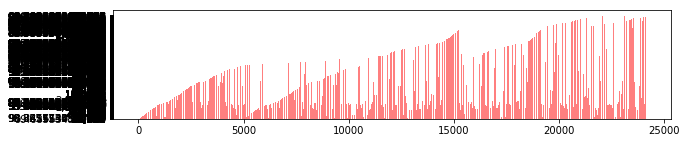

In [17]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,2))
a=plt.bar(x_axis, deathcounts["Overdose"], color='r', alpha=0.5, align="center")
b=plt.xticks(tick_locations, deathcounts['Year'], rotation="vertical")
# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(deathcounts["Overdoses"]))
# Set a Title and labels
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")
# Save our graph and show the grap
plt.tight_layout()
plt.show()
